In [72]:
import pandas as pd
import matplotlib.pyplot as plt

In [73]:
offers = pd.read_excel('segment.xlsx', sheetname = 0)
trans = pd.read_excel('segment.xlsx', sheetname = 1)

In [76]:
def create_dmap(transaction):
    customers = pd.DataFrame(transaction['Customer Last Name'].drop_duplicates()).reset_index(drop=True).sort_values(['Customer Last Name'])
    dmap = pd.DataFrame(columns=customers['Customer Last Name'])

    for i, r in transaction.sort_values(['Offer #']).iterrows():
        dmap.set_value(r['Offer #'], r['Customer Last Name'], 1);
    
    dmap.fillna(value=0, inplace=True)
    return dmap

In [77]:
dmap = create_dmap(trans)

In [78]:
dmap

Customer Last Name,Adams,Allen,Anderson,Bailey,Baker,Barnes,Bell,Bennett,Brooks,Brown,...,Turner,Walker,Ward,Watson,White,Williams,Wilson,Wood,Wright,Young
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1
7,0,0,0,1,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
8,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
9,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [88]:
from sklearn.cluster import KMeans
from time import time
clf = KMeans(init='k-means++', n_clusters=4, n_init=1000, random_state=42, max_iter=10000)
t0=time()
train=clf.fit(dmap)
print ("Time:",round(time()-t0,8),"s")
offers['Cluster'] = clf.labels_
offers.sort_values(['Cluster'])
pca_2d = train.transform(dmap)
offers

Time: 1.53089213 s


,Offer #,Campaign,Varietal,Minimum Qty (kg),Discount (%),Origin,Past Peak,Cluster
0,1,January,Malbec,72,56,France,False,2
1,2,January,Pinot Noir,72,17,France,False,0
2,3,February,Espumante,144,32,Oregon,True,2
3,4,February,Champagne,72,48,France,True,2
4,5,February,Cabernet Sauvignon,144,44,New Zealand,True,2
5,6,March,Prosecco,144,86,Chile,False,2
6,7,March,Prosecco,6,40,Australia,True,1
7,8,March,Espumante,6,45,South Africa,False,1
8,9,April,Chardonnay,144,57,Chile,False,2
9,10,April,Prosecco,72,52,California,False,2


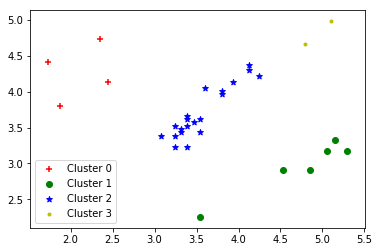

In [89]:
import numpy as np
import matplotlib.pyplot as pl
for i in range(0, pca_2d.shape[0]):
    if offers['Cluster'][i] == 0:
        c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r',
        marker='+')
    elif offers['Cluster'][i] == 1:
        c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g',
        marker='o')
    elif offers['Cluster'][i] == 2:
        c3 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='b',
        marker='*')
    elif offers['Cluster'][i] == 3:
        c4 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='y',
        marker='.')
pl.legend([c1, c2, c3,c4], ['Cluster 0', 'Cluster 1',
    'Cluster 2', 'Cluster 3'])
pl.show()

In [90]:
pca_2d.shape

(32, 4)

In [91]:
pca_2d

array([[3.60555128, 4.05517502, 2.77578818, 3.87298335],
       [2.44948974, 4.13655788, 3.147221  , 4.47213595],
       [3.53553391, 3.43187671, 2.38851418, 3.74165739],
       [4.12310563, 4.29469958, 2.93342803, 4.24264069],
       [3.082207  , 3.38296386, 1.89868375, 4.        ],
       [4.24264069, 4.21637021, 2.96732202, 3.74165739],
       [5.04975247, 3.17979734, 4.33647322, 5.19615242],
       [5.14781507, 3.33333333, 4.47269494, 5.29150262],
       [3.93700394, 4.13655788, 2.77578818, 4.35889894],
       [3.53553391, 3.62092683, 2.49098374, 3.74165739],
       [4.12310563, 4.37162568, 3.16306813, 4.24264069],
       [3.31662479, 3.48010217, 2.28144691, 4.        ],
       [3.53553391, 2.26077666, 2.68421311, 4.35889894],
       [3.80788655, 4.01386486, 2.66552059, 4.        ],
       [3.39116499, 3.66666667, 2.19203102, 3.60555128],
       [3.31662479, 3.43187671, 2.12249853, 4.12310563],
       [1.87082869, 3.80058475, 2.86443712, 4.47213595],
       [4.52769257, 2.90593263,